# Support Vector Machines - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


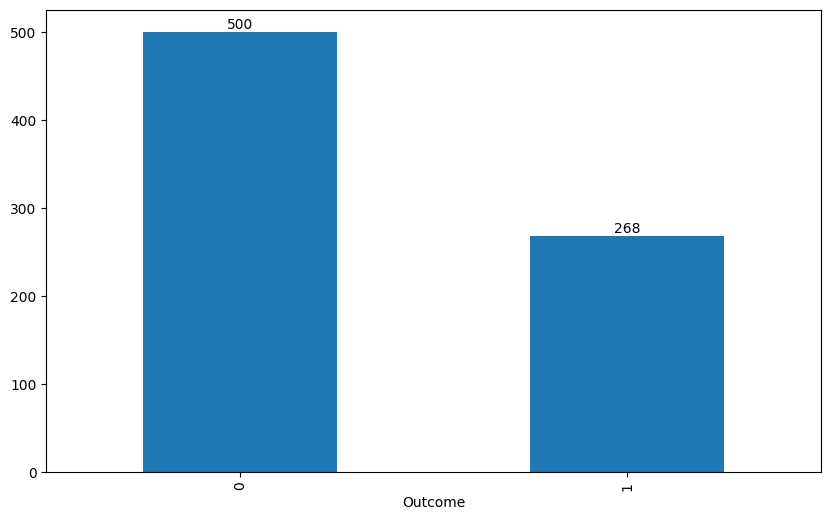

In [8]:
ax = df.Outcome.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

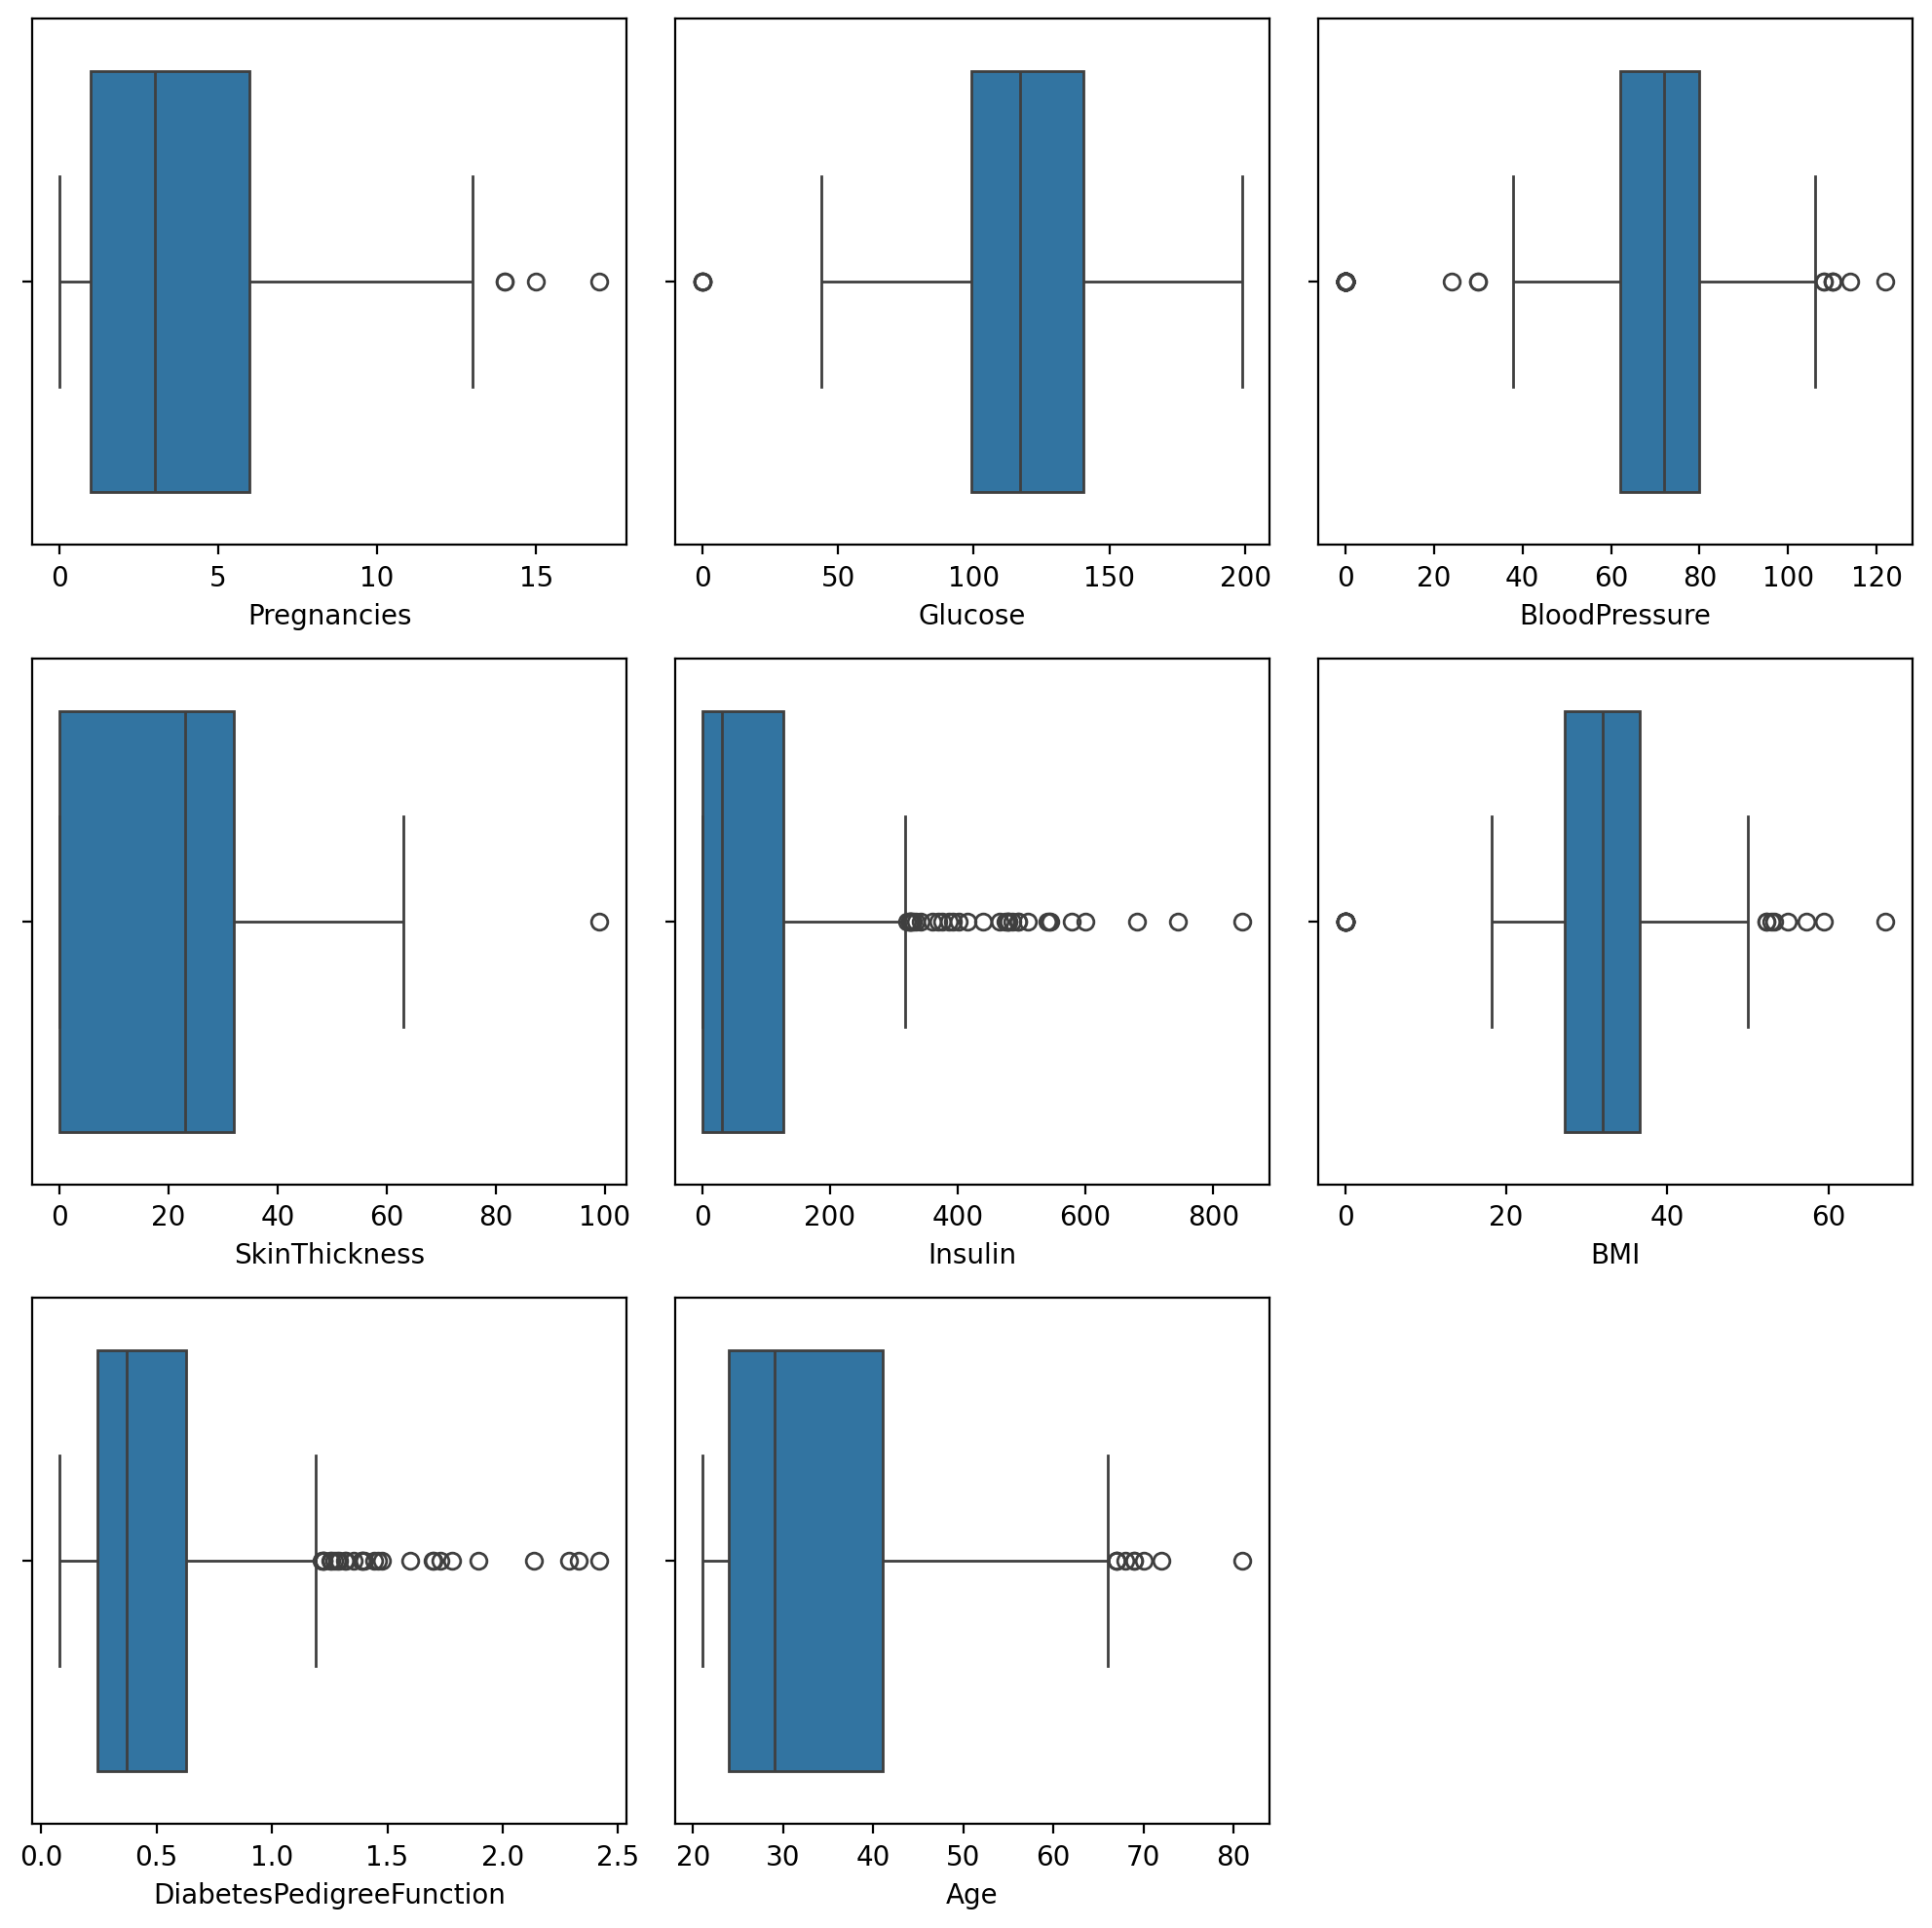

In [9]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df.columns[:-1]):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x=df[col])

plt.tight_layout();

In [10]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [11]:
df.shape

(720, 9)

In [12]:
df.Outcome.value_counts()

,count
Outcome,
0,473
1,247


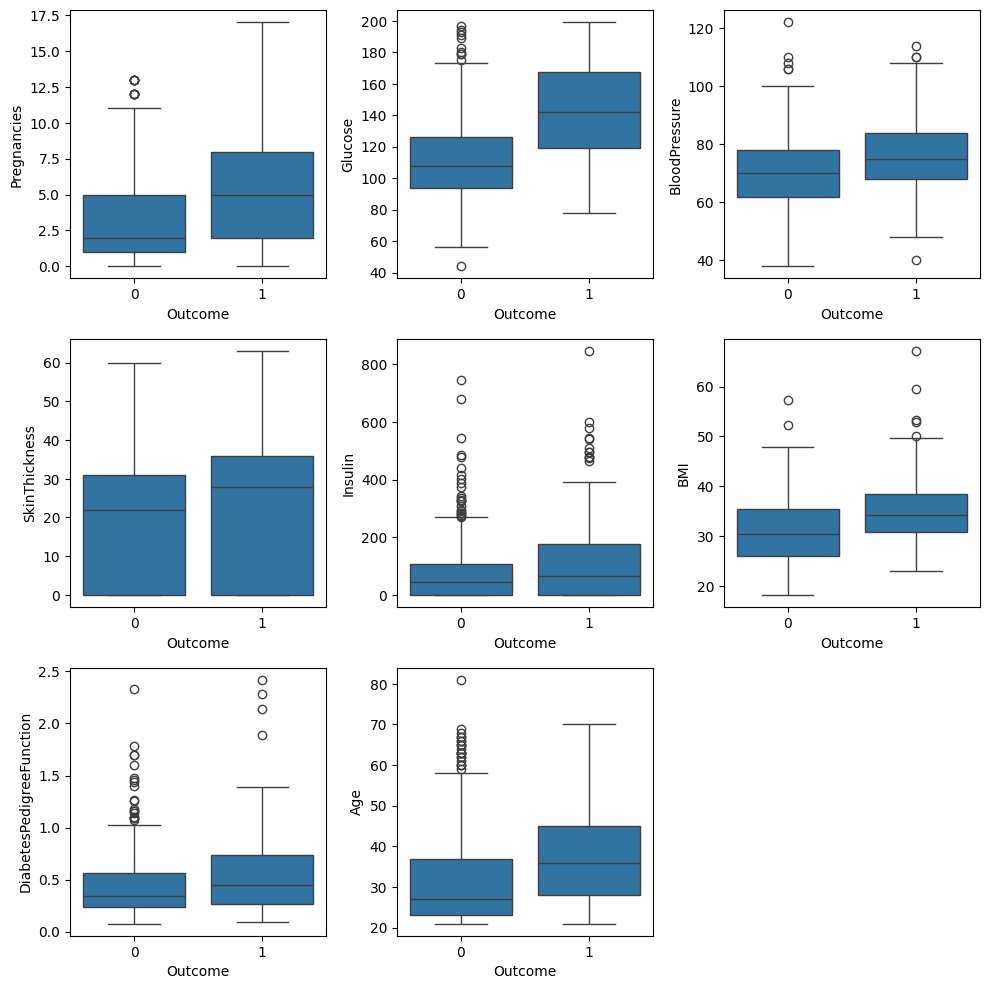

In [13]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df.columns[:-1]):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x="Outcome", y=df[col], data=df)

plt.tight_layout();

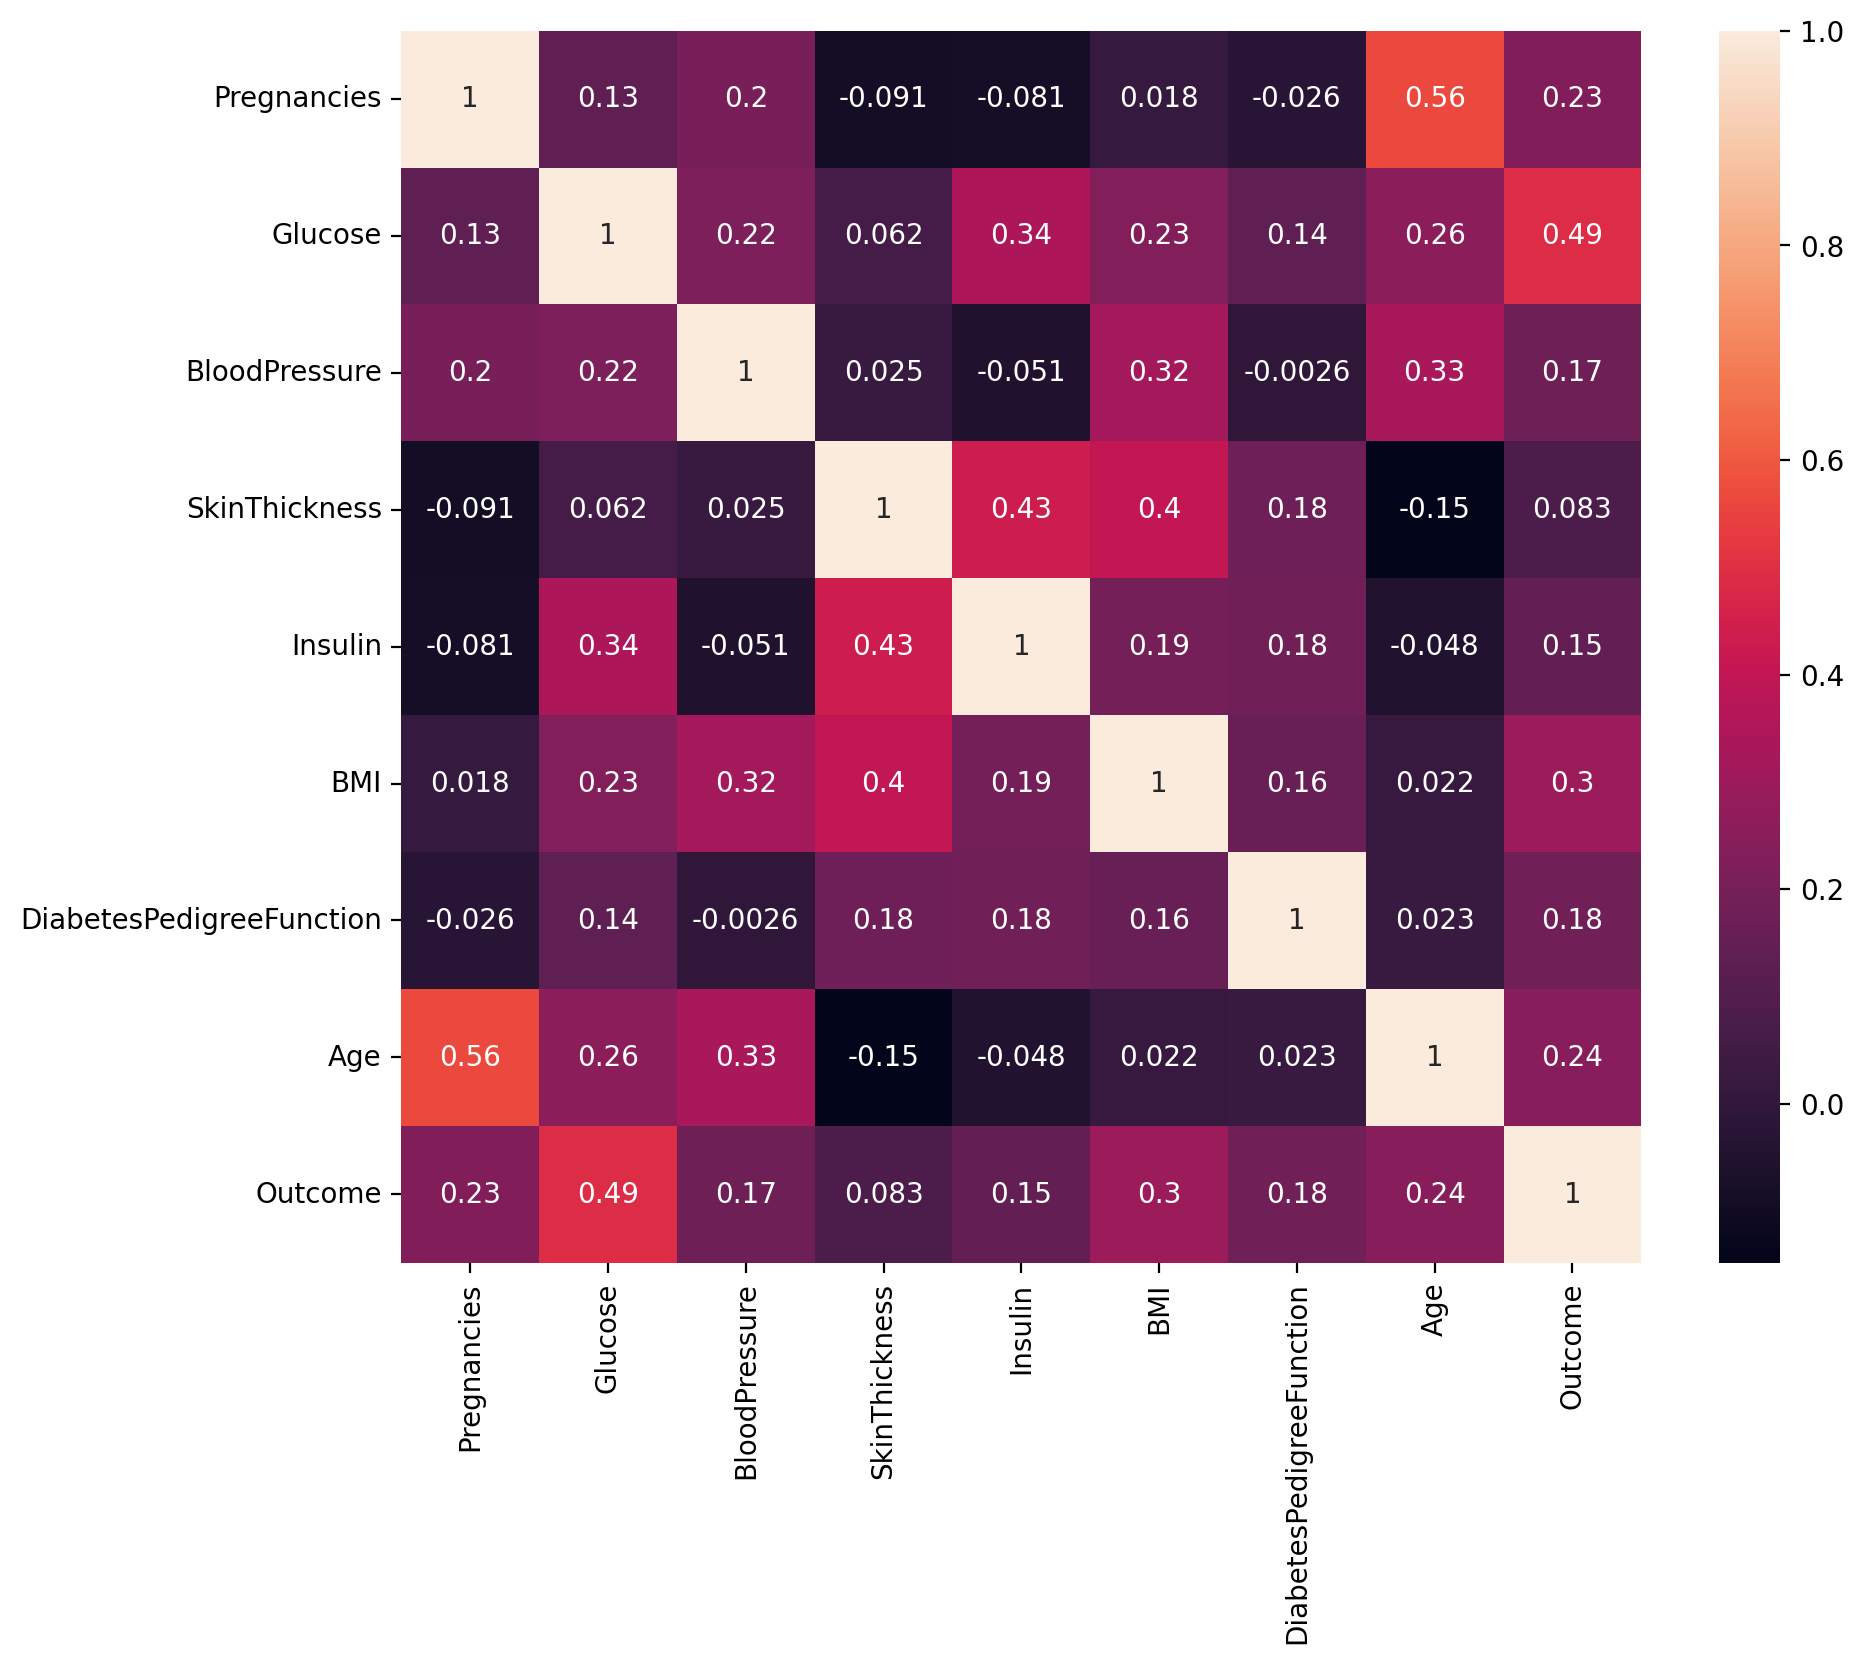

In [14]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.corr(), annot=True);

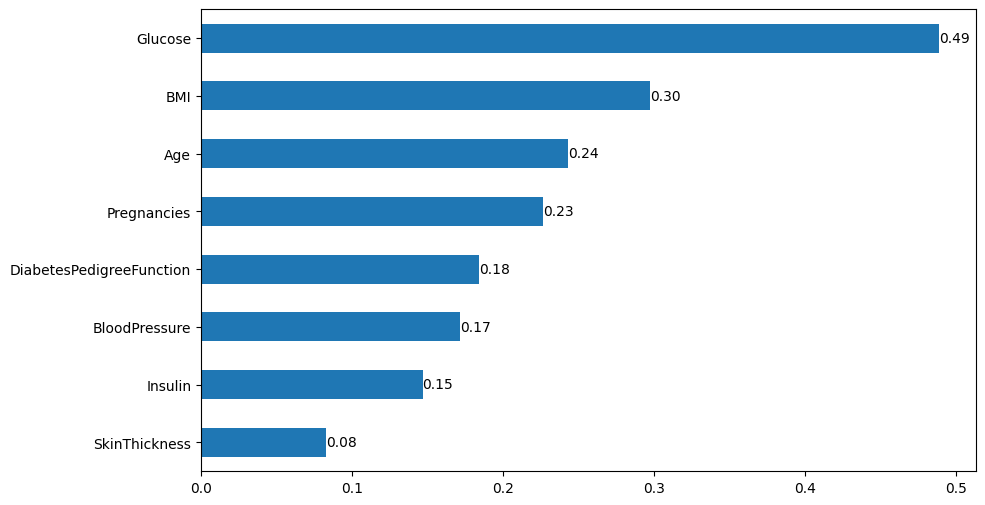

In [15]:
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

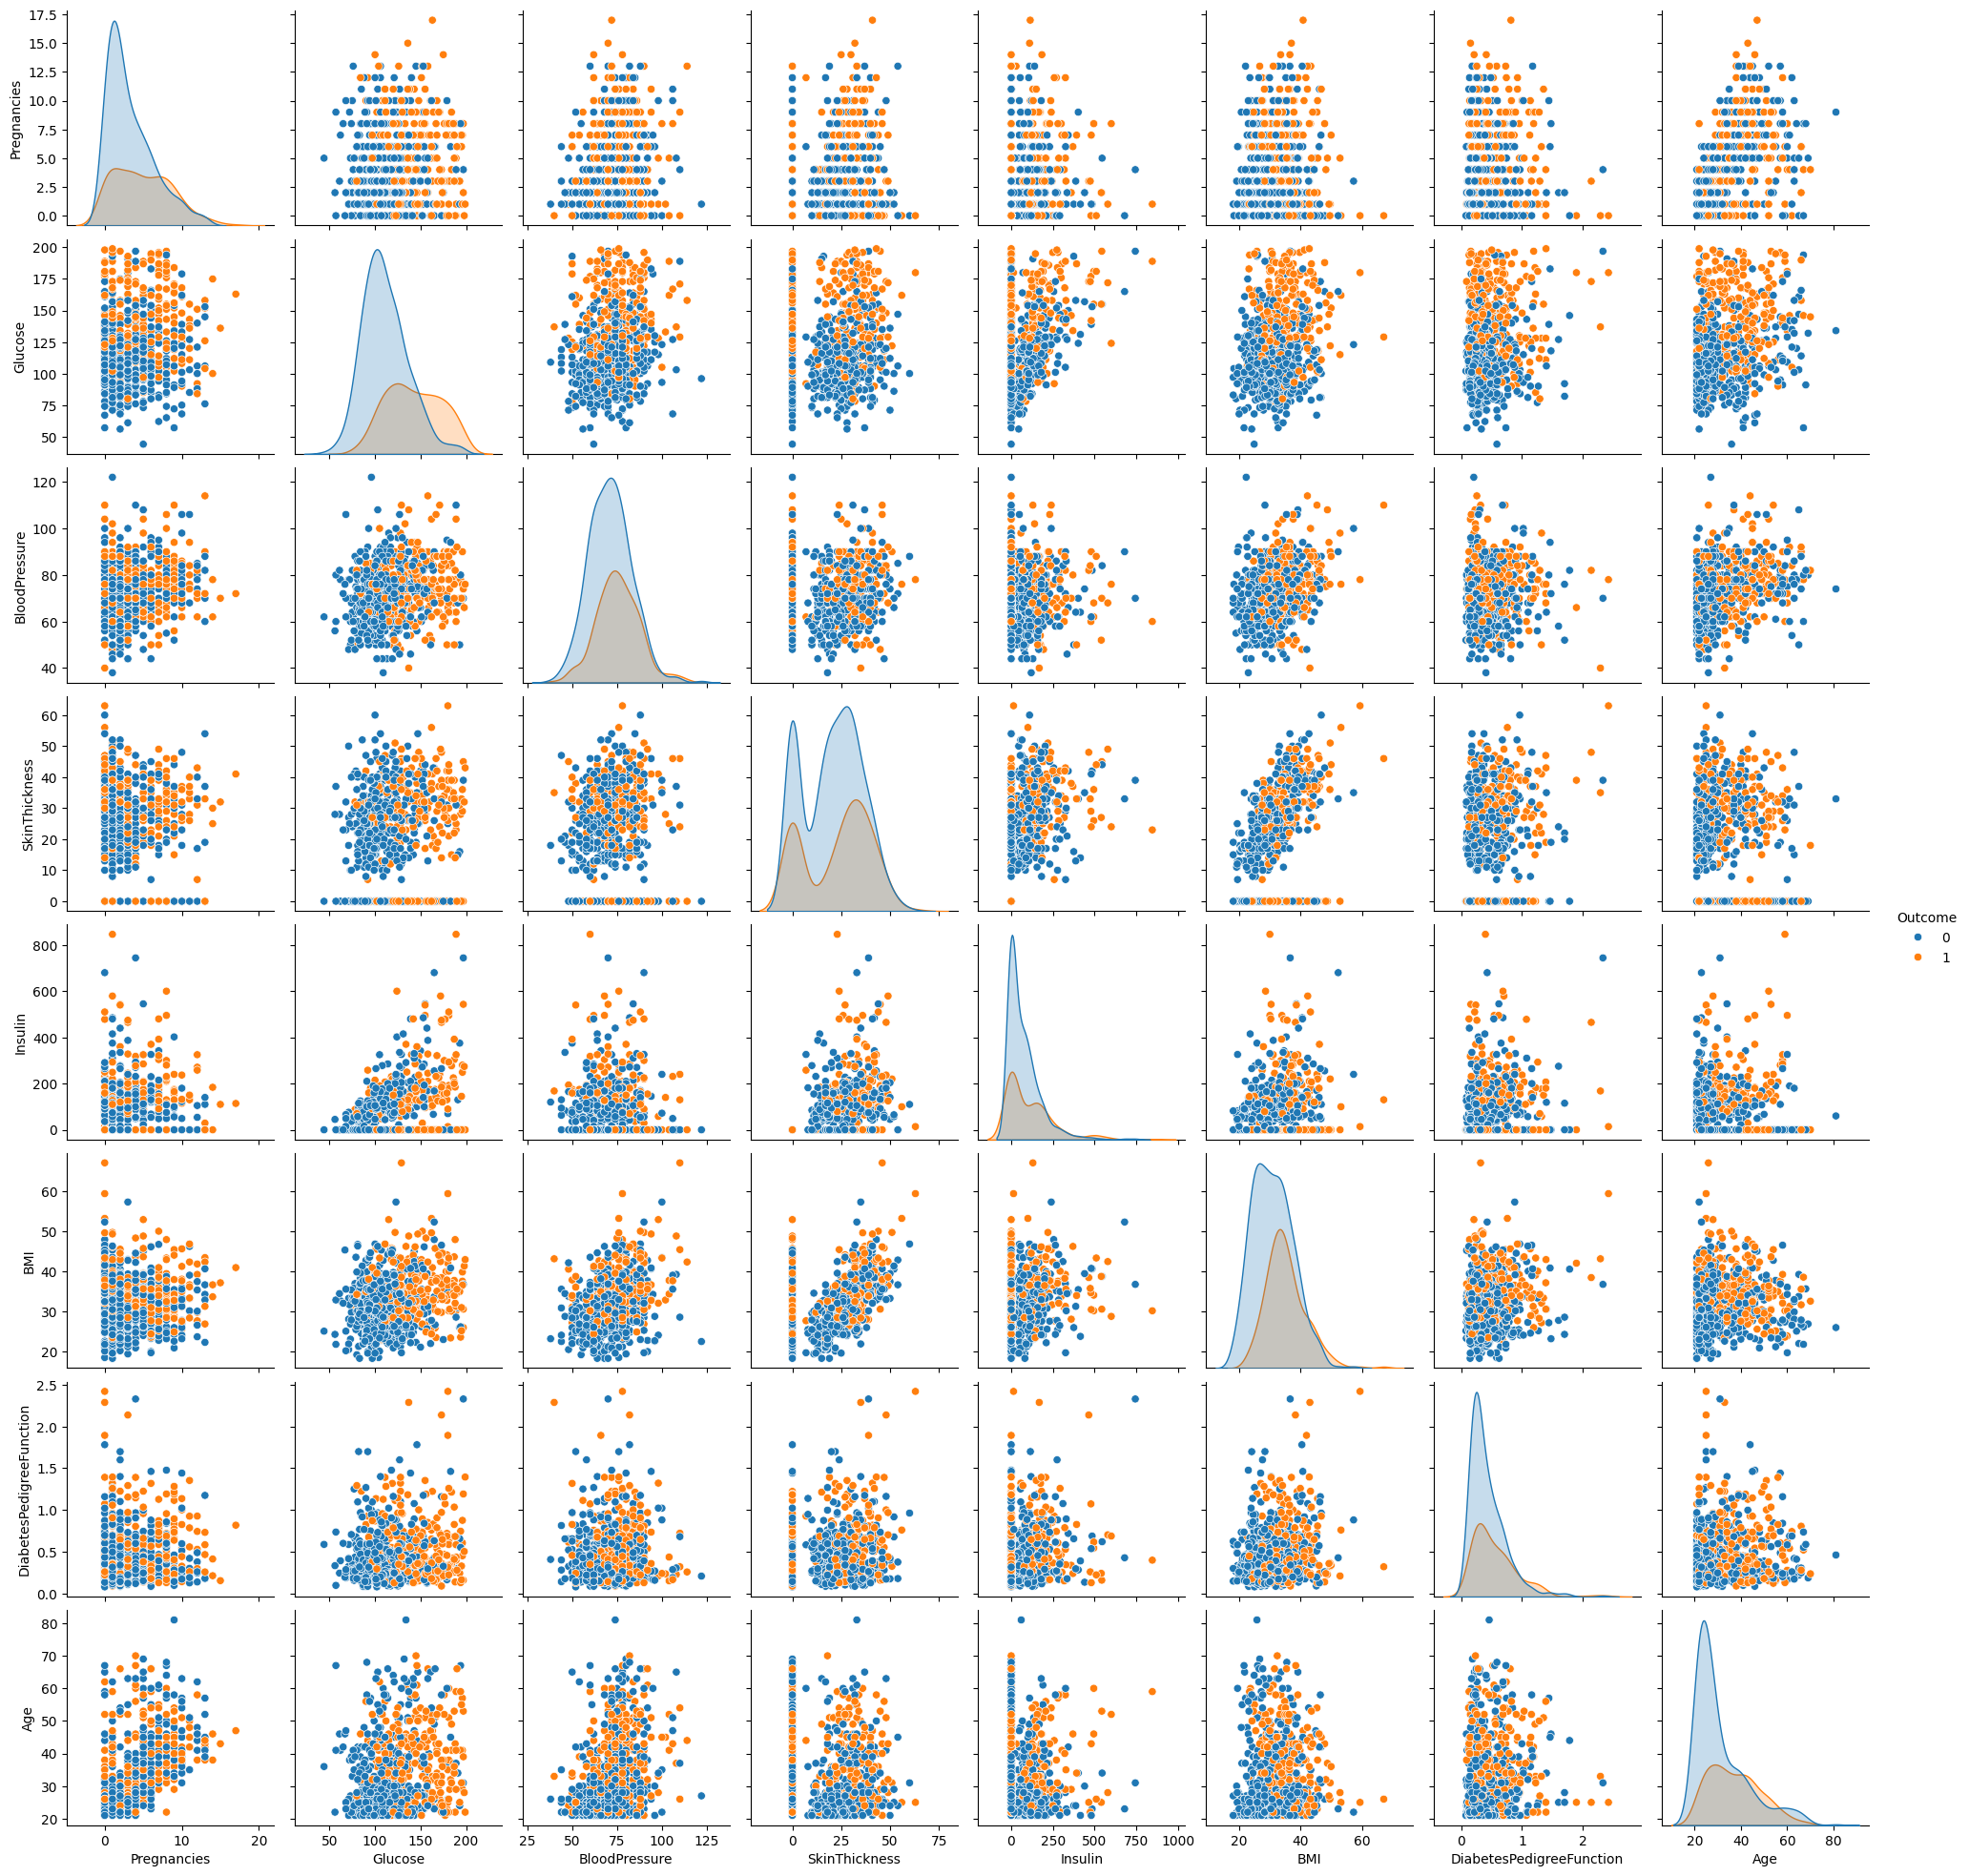

In [16]:
sns.pairplot(df, hue = "Outcome");

## Train | Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

## Modelling and Model Performance

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Without Scalling

In [21]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

# Since SVM is a distance-based model, the data needs to be scaled.
# But we will continue without scaling first to see how the results change.

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



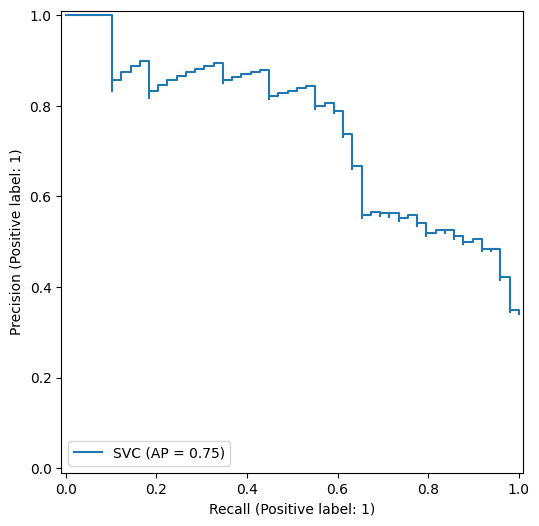

In [22]:
PrecisionRecallDisplay.from_estimator(svm_model, X_test, y_test);


In [23]:
model = SVC(probability=True)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_accuracy,0.738
train_accuracy,0.757
test_precision,0.708
train_precision,0.736
test_recall,0.420
train_recall,0.455
test_f1,0.520
train_f1,0.562


### With Scalling

In [24]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

# Now let's observe the scores by scaling.

In [25]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# If you look at the scores above, you will see that there are serious differences.
# The importance of scaling is better understood.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



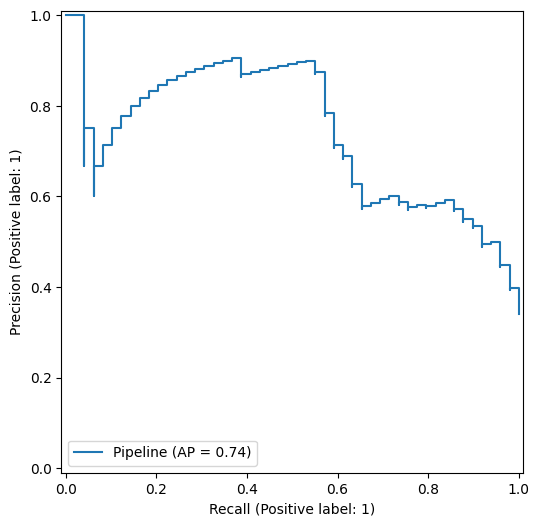

In [26]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

In [27]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_accuracy,0.752
train_accuracy,0.831
test_precision,0.673
train_precision,0.825
test_recall,0.536
train_recall,0.644
test_f1,0.594
train_f1,0.723


### With Best Parameters (GridsearchCV)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [30]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=10,
                              return_train_score=True)

# SVC does not make predictions over probabilities. It makes the predictions through the decision_function.
# If we want to get predict_proba, we need to set SVC's probabilty hyper_parameter to True.
# Decision_Function will be discussed below.

In [31]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall')

In [32]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.05, class_weight='balanced', gamma=0.3,
                     probability=True))])

In [33]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

,22
mean_test_score,0.894
mean_train_score,0.907


In [34]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[45 50]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        95
           1       0.48      0.94      0.63        49

    accuracy                           0.63       144
   macro avg       0.71      0.71      0.63       144
weighted avg       0.78      0.63      0.63       144


Train_Set
[[190 188]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       378
           1       0.49      0.90      0.63       198

    accuracy                           0.64       576
   macro avg       0.70      0.70      0.64       576
weighted avg       0.76      0.64      0.64       576



In [36]:
operations = [("scaler", StandardScaler()),
              ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True,
                                                        class_weight="balanced"))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# No need to make an extra CV after gridsearchCV.
# But if you want to see all metrics, of course you can make a CV

,0
test_accuracy,0.616
train_accuracy,0.632
test_precision,0.475
train_precision,0.482
test_recall,0.894
train_recall,0.907
test_f1,0.618
train_f1,0.629


## Should the optimal best threshold be determined in the SVM model?

In [37]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

# SVC makes prediction through the decision_function function.
# positive values indicate class 1, negative values indicate class 0.
# the larger the value, the further away the observation is from the hyper plane.

array([ 0.6092764 ,  0.84263767,  0.47386186, -0.28237901,  0.76803772,
       -0.62884362, -0.09844843,  0.86154427, -0.97054695, -0.05094376,
        0.18120991,  0.5170356 , -0.04729025, -0.47376938,  0.94867542,
        0.55804293, -0.86444305,  0.93325274,  0.69693388, -1.10693844,
        0.71138957, -0.25816866,  0.9809129 ,  0.09024727, -0.25546803,
        0.52555535, -0.59437495,  0.33109802, -0.03813883, -0.35114691,
        0.51298606,  0.32688323,  0.43189893,  0.08561673,  0.61718718,
       -0.28024343,  0.67107159,  0.35191176,  0.58870501,  0.24981652,
        0.37974359, -0.89770378, -0.88633092,  0.87825662,  0.6145391 ,
        0.22596048,  0.39718108,  0.63331752,  0.9535457 ,  0.30885256,
        0.49269475, -0.6579449 , -0.00484441, -0.64896428, -0.76417344,
        0.97359193,  0.59407135, -1.22009531,  0.67700748,  0.7735601 ,
        0.79203896,  0.65437864,  0.88127888,  1.04252632,  1.05901944,
       -0.9061641 ,  0.59385633,  0.07694606,  0.67040346, -0.74

In [38]:
predict_probe = svm_model_grid.predict_proba(X_test)[:,1]
predict_probe

# According to the predict_proba, those above 0.5 should be assigned to class 1,
# those below 0.5 should be assigned to class 0.
# However, although the 3rd observation is 0.44 assigned to class 1.
# As you can see we don't use predict_proba because predict_proba doesn't work properly in SVC.

array([0.52236394, 0.64275922, 0.45244569, 0.14714902, 0.60408491,
       0.07765232, 0.20161784, 0.64838834, 0.04116336, 0.21791983,
       0.31066053, 0.47464323, 0.21921215, 0.10400312, 0.68834952,
       0.5       , 0.05107222, 0.6814565 , 0.56753085, 0.03113585,
       0.57495809, 0.15355342, 0.70248933, 0.27181774, 0.15428179,
       0.47904326, 0.08292179, 0.38177706, 0.22247333, 0.13015829,
       0.47255354, 0.37978616, 0.43113173, 0.26992373, 0.52645205,
       0.14770494, 0.55423306, 0.39170248, 0.51172378, 0.34457665,
       0.40520615, 0.04774177, 0.04885638, 0.65623808, 0.52508384,
       0.33414667, 0.41379087, 0.53478047, 0.69050922, 0.37134369,
       0.46210365, 0.07344404, 0.23462864, 0.0747198 , 0.05980748,
       0.69931076, 0.51450054, 0.02467211, 0.55728675, 0.60693097,
       0.61646987, 0.54563893, 0.65764871, 0.72845324, 0.73515765,
       0.04692853, 0.51438929, 0.26639964, 0.55388927, 0.06213827,
       0.37375792, 0.37129752, 0.57879939, 0.33953665, 0.57992

In [39]:
svm_model_grid.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

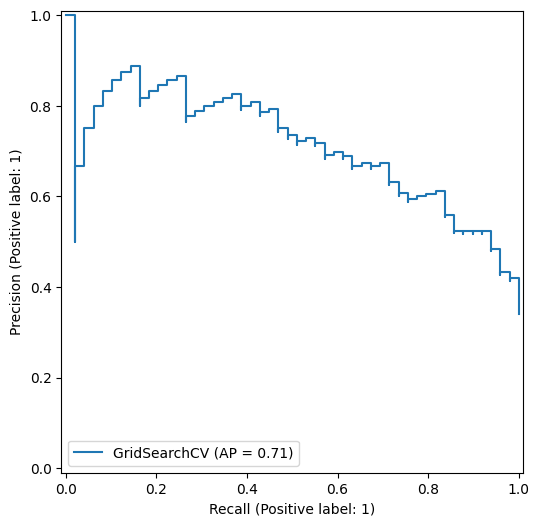

In [40]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

# We can get average precision or AUC values from SVC model decision_function.

In [41]:
average_precision_score(y_test, decision_function)

# We prefer the decision function as the average_precision score.
# Because we know the predict_proba is not working properly.

0.7133065367791772